## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)







In [ ]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

def moneta(N):
    vettore_probabilità = [0.5,0.5]
    campione = np.random.choice(a=[0,1], size=N, replace=True, p=vettore_probabilità)
    # testa = 1, croce = 0
    teste = np.sum(campione)
    freq = (teste / N) * 100
    return freq

print(f'{moneta(50)}%')

In [ ]:
def moneta(x):
    vettore_probabilità = [0.5,0.5]
    array = np.zeros(x)
    for i in range(x):
        N = np.random.choice(np.arange(10,20001))
        campione = np.random.choice(a=[0,1], size=N, replace=True, p=vettore_probabilità)
        teste = np.sum(campione)
        freq = (teste / N) * 100
        array[i] = freq
    return array

print(f'{moneta(100)}')


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [89]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [95]:
df['Embarked'] = df['Embarked'].fillna('S')

In [97]:
df.dropna(subset=['Age'], inplace=True)
df.duplicated().sum()

np.int64(0)

In [98]:
età_media = df['Age'].mean()
df['Age'] = df['Age'].fillna(età_media)
df.groupby('Pclass')['Age'].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

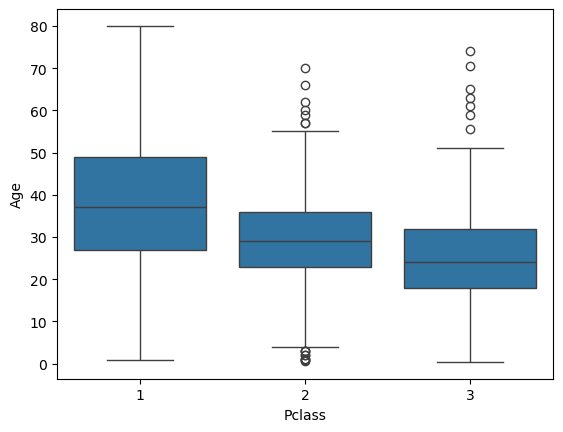

In [110]:
media_età = df.groupby('Pclass')['Age'].mean()
sns.boxplot(data=df, x='Pclass', y='Age')
plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [117]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [120]:
length = df.groupby('species')['sepal_length'].mean()
width = df.groupby('species')['sepal_width'].mean()
print(length)
print(width)

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64
species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64


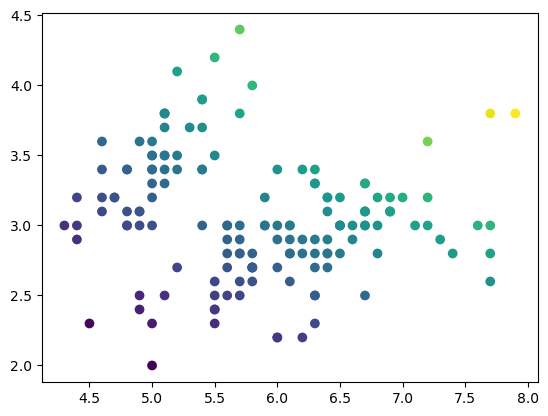

In [ ]:
area = df['sepal_length'] * df['sepal_width']
plt.scatter(x=df['sepal_length'], y=df['sepal_width'], c = area)
plt.show()


In [140]:
df['area'] = df['sepal_length'] * df['sepal_width']
df['area'].describe()

count    150.000000
mean      17.822867
std        3.361854
min       10.000000
25%       15.660000
50%       17.660000
75%       20.325000
max       30.020000
Name: area, dtype: float64

TypeError: 'str' object is not callable

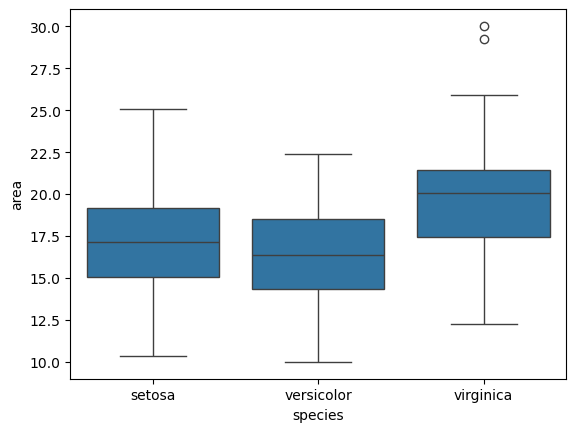

In [143]:
sns.boxplot(data = df, x='species', y='area')
plt.title("Distribuzione dell'area del petalo per specie")
plt.show()